In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read csv and create DataFrame
data_csv = pd.read_csv("../data/flights.csv")
df = pd.DataFrame(data_csv).set_index("id")

In [3]:
# Create column descriptions
columns_legend = {
    "id": "Unique identifier for each flight record",
    "year": "Year the flight was recorded (Gregorian calendar)",
    "month": "Numerical value of the month the flight occurred (1-12)",
    "day": "Day of the month when the flight occurred (1-31)",
    "dep_time": "Actual departure time (24-hour format, hhmm)",
    "sched_dep_time": "Scheduled departure time (24-hour format, hhmm)",
    "dep_delay": "Minutes difference between scheduled and actual departure (positive for delay, negative for early departure)",
    "arr_time": "Actual arrival time (24-hour format, hhmm)",
    "sched_arr_time": "Scheduled arrival time (24-hour format, hhmm)",
    "arr_delay": "Minutes difference between scheduled and actual arrival (positive for delay, negative for early arrival)",
    "carrier": "Two-letter airline carrier code (e.g., AA for American Airlines)",
    "flight": "Flight number assigned to the flight",
    "tailnum": "Unique aircraft tail number",
    "origin": "Three-letter code of the departure airport",
    "dest": "Three-letter code of the destination airport",
    "air_time": "Total time in the air, in minutes (excludes ground time)",
    "distance": "Distance traveled from origin to destination, in miles",
    "hour": "Hour of scheduled departure time (24-hour format)",
    "minute": "Minute of scheduled departure time",
    "time_hour": "Full timestamp for scheduled departure (yyyy-mm-dd hh:mm:ss, 24-hour format)",
    "name": "Full name of the airline carrier",
}

# Display legend as dataframe
df_cl = pd.DataFrame(
    list(columns_legend.items()), columns=["Column Name", "Description"]
)
df_cl = df_cl.style.set_properties(**{"text-align": "left"})
df_cl

,Column Name,Description
0,id,Unique identifier for each flight record
1,year,Year the flight was recorded (Gregorian calendar)
2,month,Numerical value of the month the flight occurred (1-12)
3,day,Day of the month when the flight occurred (1-31)
4,dep_time,"Actual departure time (24-hour format, hhmm)"
5,sched_dep_time,"Scheduled departure time (24-hour format, hhmm)"
6,dep_delay,"Minutes difference between scheduled and actual departure (positive for delay, negative for early departure)"
7,arr_time,"Actual arrival time (24-hour format, hhmm)"
8,sched_arr_time,"Scheduled arrival time (24-hour format, hhmm)"
9,arr_delay,"Minutes difference between scheduled and actual arrival (positive for delay, negative for early arrival)"


In [4]:
# Give columns_legend to df as attributes
df.attrs = columns_legend

## DataFrame Exploration
- Summarize & Visualize Data
- Identify Patterns
- Find Relationships
- Note Potential Anomalies

## Exploration Scope
We want to know two things:
- What causes flight delays
- How can we better predict delays

In [5]:
# Examine df
df.attrs

{'id': 'Unique identifier for each flight record',
 'year': 'Year the flight was recorded (Gregorian calendar)',
 'month': 'Numerical value of the month the flight occurred (1-12)',
 'day': 'Day of the month when the flight occurred (1-31)',
 'dep_time': 'Actual departure time (24-hour format, hhmm)',
 'sched_dep_time': 'Scheduled departure time (24-hour format, hhmm)',
 'dep_delay': 'Minutes difference between scheduled and actual departure (positive for delay, negative for early departure)',
 'arr_time': 'Actual arrival time (24-hour format, hhmm)',
 'sched_arr_time': 'Scheduled arrival time (24-hour format, hhmm)',
 'arr_delay': 'Minutes difference between scheduled and actual arrival (positive for delay, negative for early arrival)',
 'carrier': 'Two-letter airline carrier code (e.g., AA for American Airlines)',
 'flight': 'Flight number assigned to the flight',
 'tailnum': 'Unique aircraft tail number',
 'origin': 'Three-letter code of the departure airport',
 'dest': 'Three-lette

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute         

### Insights from df.info()

Right away we can see that these columns have missing data.
This was most likely cause by canceled flights, error in data entry, or a just a simple reporting issue

### Follow up Query

What (if any) patterns are there in the missing data? Such as certain airline, specific times of year, weather patterns, ect.

In [7]:
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [8]:
df = df.dropna(how="any")

In [9]:
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

In [10]:
df.sample(n=5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
156327,2013,3,22,1330.0,1340,-10.0,1428.0,1443,-15.0,EV,4088,N13958,EWR,ALB,35.0,143,13,40,2013-03-22 13:00:00,ExpressJet Airlines Inc.
195366,2013,5,3,550.0,550,0.0,852.0,845,7.0,UA,1077,N37277,EWR,MIA,164.0,1085,5,50,2013-05-03 05:00:00,United Air Lines Inc.
144649,2013,3,10,816.0,800,16.0,1007.0,1004,3.0,B6,1273,N179JB,JFK,CHS,89.0,636,8,0,2013-03-10 08:00:00,JetBlue Airways
26364,2013,1,31,1049.0,1039,10.0,1345.0,1330,15.0,B6,31,N706JB,JFK,MCO,159.0,944,10,39,2013-01-31 10:00:00,JetBlue Airways
320621,2013,9,13,1320.0,1325,-5.0,1611.0,1627,-16.0,UA,483,N529UA,EWR,FLL,153.0,1065,13,25,2013-09-13 13:00:00,United Air Lines Inc.


In [11]:
df.dep_time = df.dep_time.astype(int)
df.dep_time = df.dep_time.astype(str).str.zfill(4)
df.sched_dep_time = df.sched_dep_time.astype(str).str.zfill(4)

df.dep_time = pd.to_datetime(df.dep_time, format="%H%M%S").dt.strftime("%H:%M:%S")
df.sched_dep_time = pd.to_datetime(df.sched_dep_time, format="%H%M%S").dt.strftime(
    "%H:%M:%S"
)

In [12]:
df[["dep_time", "sched_dep_time"]].sample(n=5)

,dep_time,sched_dep_time
id,,
326803,07:04:04,07:05:00
162315,19:04:05,19:03:03
945,07:01:05,07:02:01
284197,15:02:02,15:01:09
21677,19:01:03,18:05:09


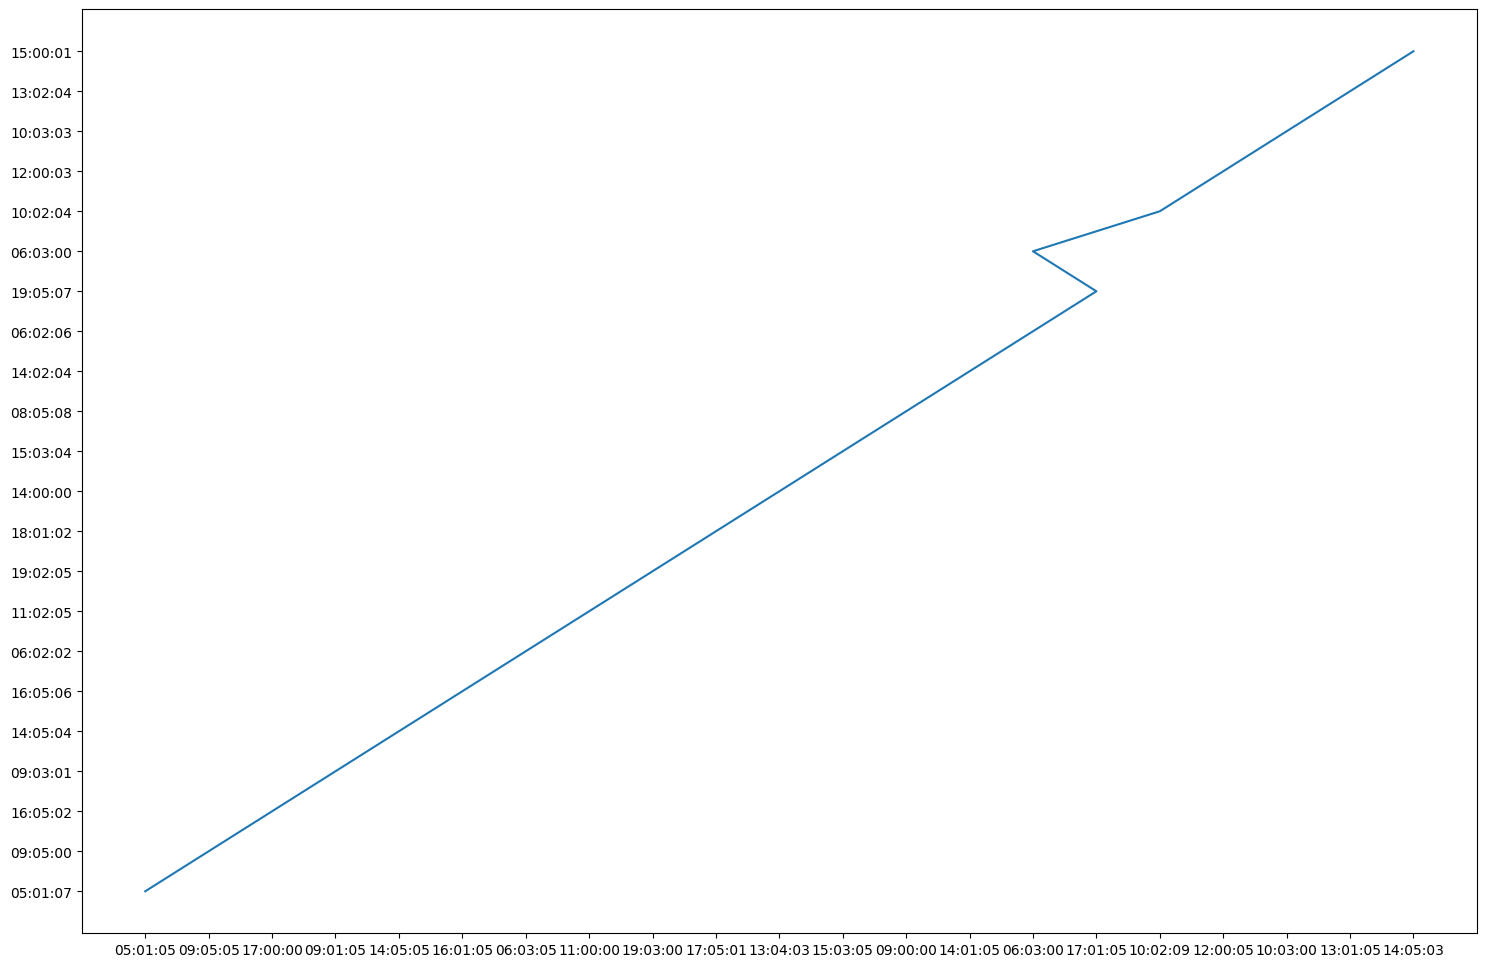

In [18]:
x = df.sched_dep_time[::15000]
y = df.dep_time[::15000]

plt.title = "Departure Discrepancies"
plt.xlabel = "Departure Time"
plt.ylabel = "Scheduled Departure Time"

plt.figure(figsize=(18, 12)).tight_layout()
plt.plot(x, y)

plt.show()

AttributeError: 'Axes' object has no attribute 'twin'

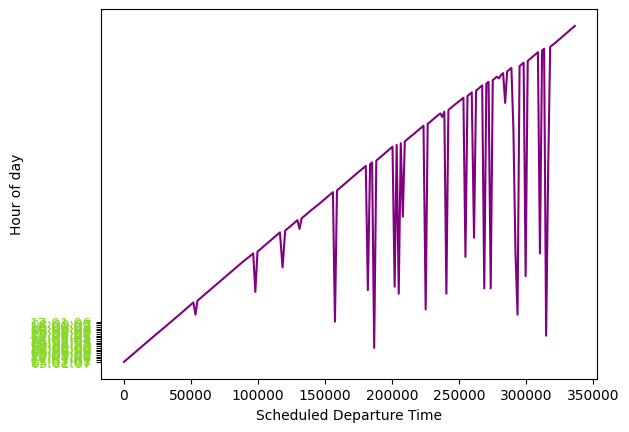

In [30]:
y1 = df.dep_time[::1500]
y2 = df.sched_dep_time[::1500]

fig, ax1 = plt.subplots()

# x-axis 1
ax1.plot(y1, color="purple")
ax1.set_xlabel("Scheduled Departure Time")
ax1.tick_params(axis="y", labelcolor="#89d728")

ax1.set_yticks(range(0, 24))
ax1.set_ylabel("Hour of day")

# x-axis 2
ax2 = ax1.twin()
ax2.plot(y2, color="pink", label="Departure Time")
ax2.tick_params(axis="y", labelcolor="#89d728")

fig.tight_layout()
plt.show()